>[Introduction](#scrollTo=LyPcLjypTCFZ)

>[Data Wrangling](#scrollTo=mYl6rTYmUoZc)

>[Data Exploration](#scrollTo=PvAs2xZIvBG3)

>[Predictive Model Development](#scrollTo=YIblkxn7Wnd-)

>[Model Evaluation and Refinement](#scrollTo=OYXioVduYGvA)



# Introduction

**House Sales in King County, USA**

Real Estate Investment Trust  would like to start investing in Residential real estate. The task is determining the market price of a house given a set of features. The goal is analyze and predict housing prices using attributes or features such as square footage, number of bedrooms, number of floors, and so on.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [3]:
file_name='kc_house_data.csv'
df = pd.read_csv(file_name)

In [5]:
df.head()

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,7129300520,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,6414100192,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,5631500400,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,3,2487200875,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,4,1954400510,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [6]:
df.dtypes

Unnamed: 0         int64
id                 int64
date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [7]:
df.describe()

,Unnamed: 0,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21613.00000,2.161300e+04,2.161300e+04,21600.000000,21603.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,10806.00000,4.580302e+09,5.400881e+05,3.372870,2.115736,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,...,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,6239.28002,2.876566e+09,3.671272e+05,0.926657,0.768996,918.440897,4.142051e+04,0.539989,0.086517,0.766318,...,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,0.00000,1.000102e+06,7.500000e+04,1.000000,0.500000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,...,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,5403.00000,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,...,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,10806.00000,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,...,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,16209.00000,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,...,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,21612.00000,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,...,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


# 1. Data Wrangling

In [8]:
df.drop(columns=["id", "Unnamed: 0"], inplace=True)
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [9]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21600.000000,21603.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.372870,2.115736,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.926657,0.768996,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,1.000000,0.500000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


* Handling missing data

In [10]:
print("number of NaN values for the column bedrooms :", df['bedrooms'].isnull().sum())
print("number of NaN values for the column bathrooms :", df['bathrooms'].isnull().sum())

number of NaN values for the column bedrooms : 13
number of NaN values for the column bathrooms : 10


In [11]:
mean=df['bedrooms'].mean()
df['bedrooms'].replace(np.nan,mean, inplace=True)

mean=df['bathrooms'].mean()
df['bathrooms'].replace(np.nan,mean, inplace=True)

In [12]:
print("number of NaN values for the column bedrooms :", df['bedrooms'].isnull().sum())
print("number of NaN values for the column bathrooms :", df['bathrooms'].isnull().sum())

number of NaN values for the column bedrooms : 0
number of NaN values for the column bathrooms : 0


# 2. Data Exploration

In [14]:
floor_counts = df['floors'].value_counts()
floor_counts_df = floor_counts.to_frame()
print(floor_counts_df)

     floors
1.0   10680
2.0    8241
1.5    1910
3.0     613
2.5     161
3.5       8


 determining whether houses with a waterfront view or without a waterfront view have more price outliers using boxplot

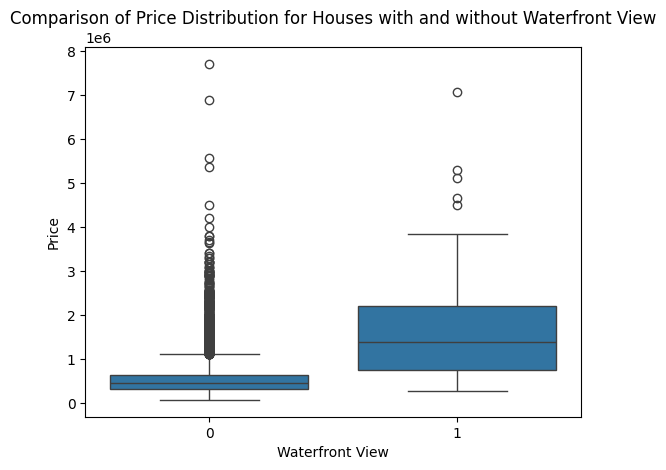

In [15]:
sns.boxplot(x='waterfront', y='price', data=df)
plt.xlabel('Waterfront View')
plt.ylabel('Price')
plt.title('Comparison of Price Distribution for Houses with and without Waterfront View')
plt.show()

Price distribustion

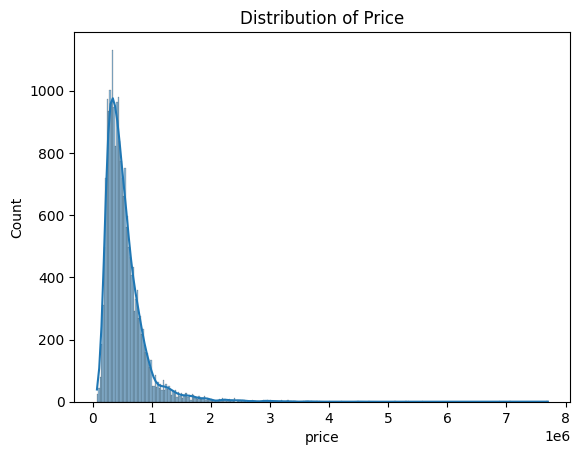

In [17]:
import seaborn as sns
df = df[df['price']!=0.0]
sns.histplot(df['price'], kde=True)
plt.title('Distribution of Price')
plt.show()

 determining if the feature sqft_above is negatively or positively correlated with price.

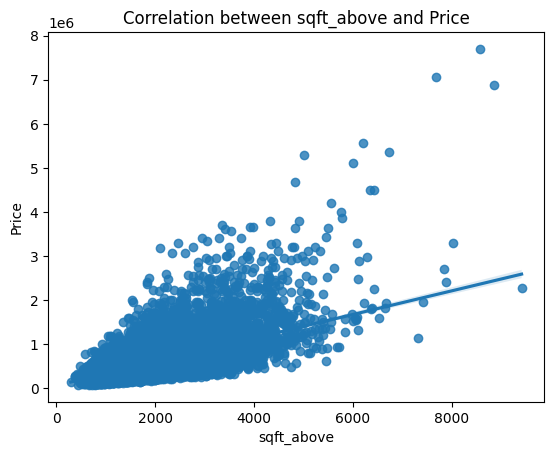

In [19]:
sns.regplot(x='sqft_above', y='price', data=df)
plt.xlabel('sqft_above')
plt.ylabel('Price')
plt.title('Correlation between sqft_above and Price')
plt.show()

In [ ]:
df.corr()['price'].sort_values()

<ipython-input-17-78b4f396fb2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['price'].sort_values()


zipcode         -0.053203
long             0.021626
condition        0.036362
yr_built         0.054012
sqft_lot15       0.082447
sqft_lot         0.089661
yr_renovated     0.126434
floors           0.256794
waterfront       0.266369
lat              0.307003
bedrooms         0.308797
sqft_basement    0.323816
view             0.397293
bathrooms        0.525738
sqft_living15    0.585379
sqft_above       0.605567
grade            0.667434
sqft_living      0.702035
price            1.000000
Name: price, dtype: float64

<ipython-input-21-eae661adad49>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


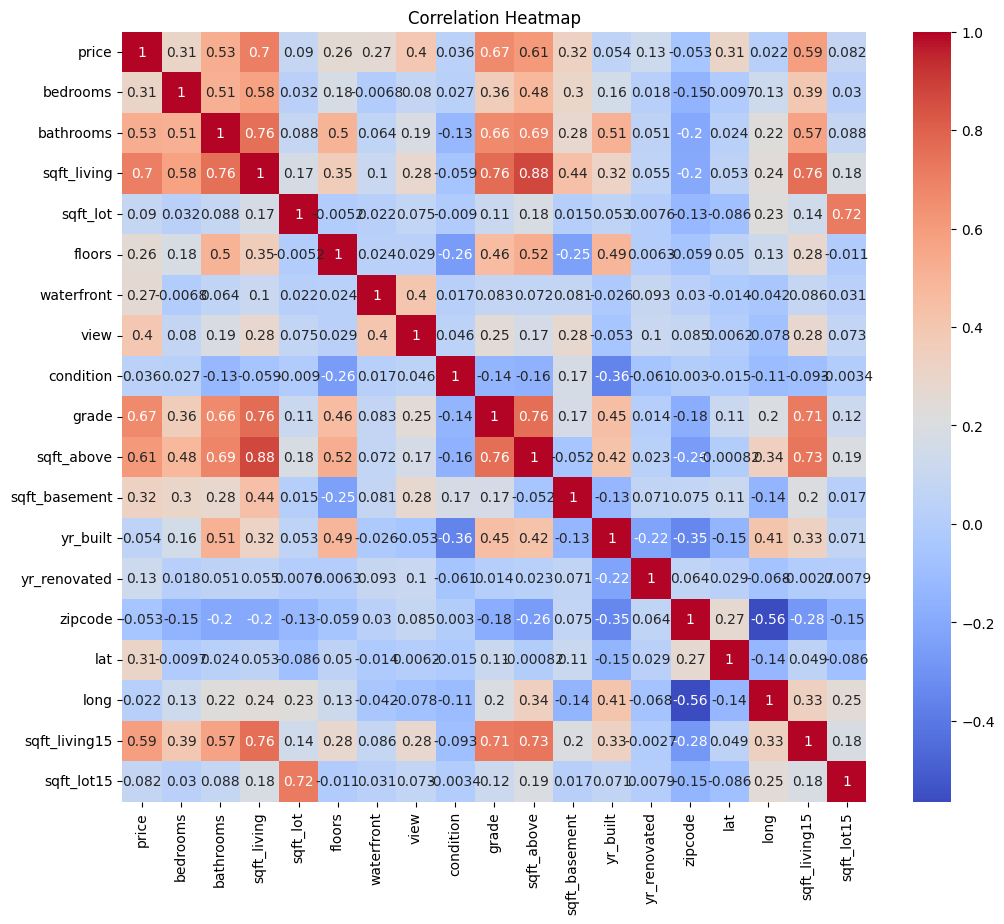

In [21]:
# Heatmap for numerical variables
corr_matrix = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# 3. Predictive Model Development

In [22]:
X = df[['long']]
Y = df['price']
lm = LinearRegression()
lm.fit(X,Y)
lm.score(X, Y)

0.00046769430149007363

In [23]:
from sklearn.metrics import r2_score
X = df[['sqft_living']]
y = df['price']

# Create a linear regression model and fit it to the data
model = LinearRegression()
model.fit(X, y)

# Make predictions using the model
y_pred = model.predict(X)

# Calculate the R^2 score
r2 = r2_score(y, y_pred)

# Print the R^2 score
print("R^2 Score:", r2)

R^2 Score: 0.4928532179037931


In [24]:
features =["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]

In [25]:
X = df[features]
y = df['price']

# Create a linear regression model and fit it to the data
model = LinearRegression()
model.fit(X, y)

# Make predictions using the model
y_pred = model.predict(X)

# Calculate the R^2 score
r2 = r2_score(y, y_pred)

# Print the R^2 score
print("R^2 Score:", r2)

R^2 Score: 0.6576722447699446


* Pipline

In [26]:
Input=[('scale',StandardScaler()),('polynomial', PolynomialFeatures(include_bias=False)),('model',LinearRegression())]

In [27]:
# Create the pipeline object
pipeline = Pipeline(Input)

# Split the data into feature (X) and target (y)
X = df[features]
y = df['price']

# Fit the pipeline object to the data
pipeline.fit(X, y)

# Make predictions using the fitted pipeline object
y_pred = pipeline.predict(X)

# Calculate the R^2 score
r2 = r2_score(y, y_pred)

# Print the R^2 score
print("R^2 Score:", r2)

R^2 Score: 0.7513410648797747


# 4. Model Evaluation and Refinement

In [28]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

In [29]:
features =["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]
X = df[features]
Y = df['price']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.15, random_state=1)


print("number of test samples:", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples: 3242
number of training samples: 18371


In [30]:
from sklearn.linear_model import Ridge

In [31]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(x_train)
X_test_scaled = scaler.transform(x_test)

# Create and fit the Ridge regression object with regularization parameter 0.1
ridge_model = Ridge(alpha=0.1)
ridge_model.fit(X_train_scaled, y_train)

# Make predictions using the Ridge model on the test data
y_pred = ridge_model.predict(X_test_scaled)

# Calculate the R^2 score
r2 = r2_score(y_test, y_pred)

# Print the R^2 score
print("R^2 Score on Test Data:", r2)

R^2 Score on Test Data: 0.64788349655774


In [32]:
poly_transform = PolynomialFeatures(degree=2)
x_train_poly = poly_transform.fit_transform(x_train)
x_test_poly = poly_transform.transform(x_test)

# Standardize the features (optional, but recommended for regularization methods)
scaler = StandardScaler()
X_train_poly_scaled = scaler.fit_transform(x_train_poly)
X_test_poly_scaled = scaler.transform(x_test_poly)

# Create and fit the Ridge regression object with regularization parameter 0.1
ridge_model = Ridge(alpha=0.1)
ridge_model.fit(X_train_poly_scaled, y_train)

# Make predictions using the Ridge model on the test data
y_pred = ridge_model.predict(X_test_poly_scaled)

# Calculate the R^2 score
r2 = r2_score(y_test, y_pred)

# Print the R^2 score
print("R^2 Score on Test Data:", r2)

R^2 Score on Test Data: 0.7040372277883169
